In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-100-imdb-movies/TOP 100 IMDB MOVIES.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
!pip install nltk
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Import Data

In [3]:
df=pd.read_csv('/kaggle/input/top-100-imdb-movies/TOP 100 IMDB MOVIES.csv')

# Exploratory Data Analysis (EDA)

In [4]:
df.head()

,rank,title,description,genre,rating,year
0,18,Spider-Man: Across the Spider-Verse,"Miles Morales catapults across the Multiverse,...","['Animation', 'Action', 'Adventure']",8.7,2023
1,32,Oppenheimer,"The story of American scientist, J. Robert Opp...","['Biography', 'Drama', 'History']",8.6,2023
2,77,Joker,A mentally troubled stand-up comedian embarks ...,"['Crime', 'Drama', 'Thriller']",8.4,2019
3,76,Avengers: Endgame,After the devastating events of Avengers: Infi...,"['Action', 'Adventure', 'Drama']",8.4,2019
4,37,Parasite,Greed and class discrimination threaten the ne...,"['Drama', 'Thriller']",8.5,2019


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   title        100 non-null    object 
 2   description  100 non-null    object 
 3   genre        100 non-null    object 
 4   rating       100 non-null    float64
 5   year         100 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB
None


In [6]:
print(df.describe())

             rank     rating         year
count  100.000000  100.00000   100.000000
mean    50.500000    8.52200  1988.070000
std     29.011492    0.20869    23.069178
min      1.000000    8.30000  1931.000000
25%     25.750000    8.40000  1974.750000
50%     50.500000    8.50000  1994.000000
75%     75.250000    8.60000  2003.250000
max    100.000000    9.30000  2023.000000


In [7]:
print(df.isnull().sum())

rank           0
title          0
description    0
genre          0
rating         0
year           0
dtype: int64


In [8]:
print(df[["rating", "year"]].describe())

          rating         year
count  100.00000   100.000000
mean     8.52200  1988.070000
std      0.20869    23.069178
min      8.30000  1931.000000
25%      8.40000  1974.750000
50%      8.50000  1994.000000
75%      8.60000  2003.250000
max      9.30000  2023.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


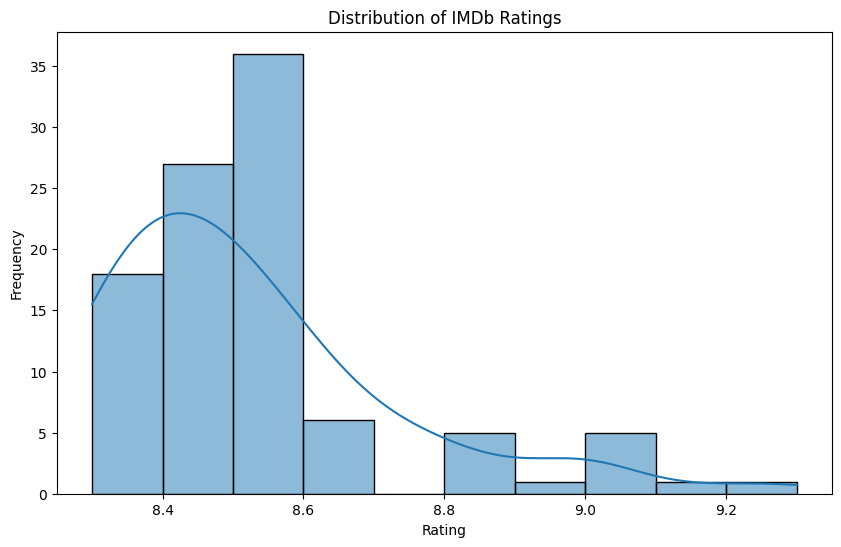

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

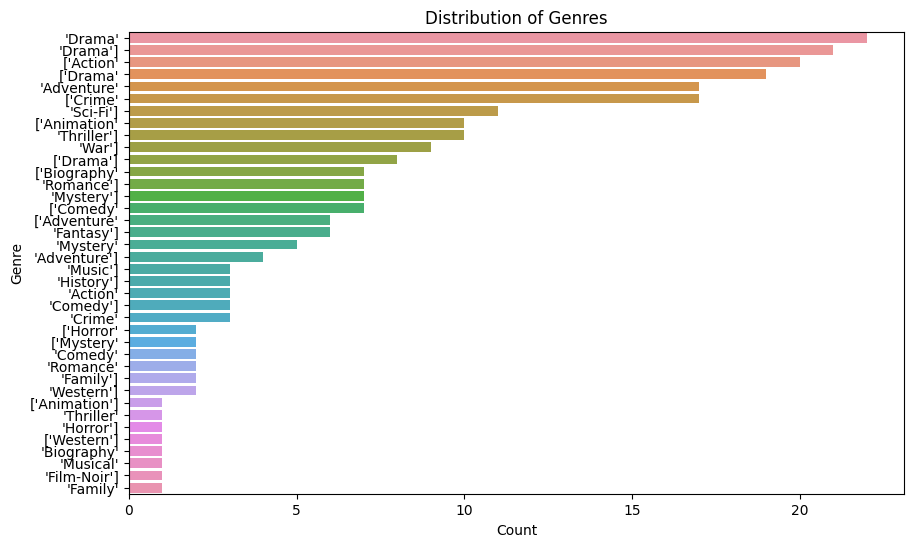

In [10]:
df['genre'] = df['genre'].apply(lambda x: x.split(', '))
all_genres = df['genre'].explode()
plt.figure(figsize=(10, 6))
sns.countplot(y=all_genres, order=all_genres.value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


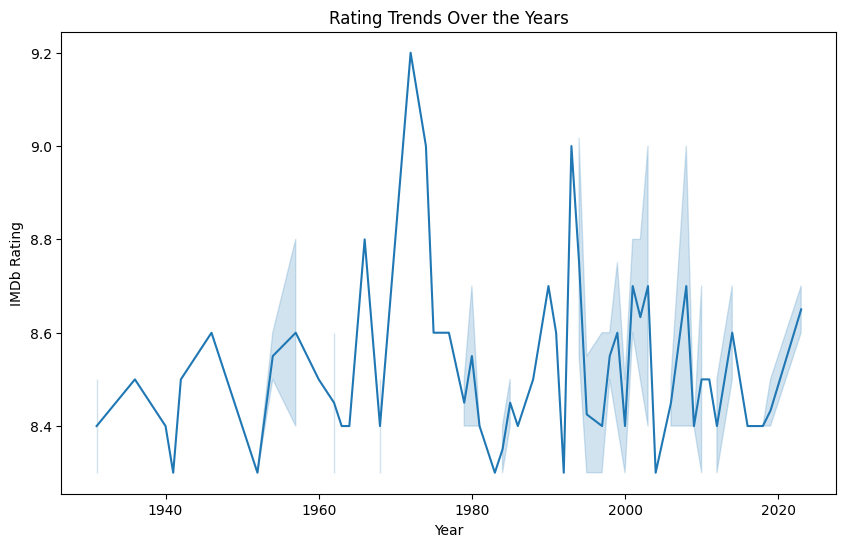

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='rating', data=df)
plt.title('Rating Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.show()

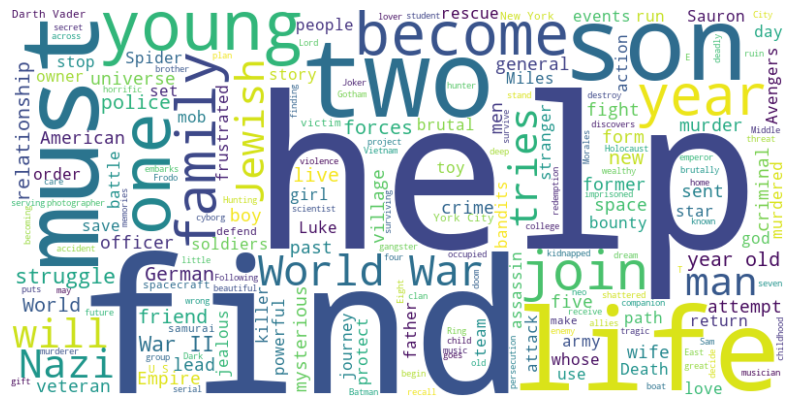

In [12]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['description']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Feature Engineering

In [13]:
df['movie_age'] = 2024 - df['year']#to find age of movies

## One-Hot Encoding

In [14]:
df_exploded = df.explode('genre')
df_onehot = pd.get_dummies(df_exploded['genre'], prefix='genre').groupby(df['title']).sum()

In [15]:
df = df.join(df_onehot, on='title')

In [16]:
print(df.head())

   rank                                title  \
0    18  Spider-Man: Across the Spider-Verse   
1    32                          Oppenheimer   
2    77                                Joker   
3    76                    Avengers: Endgame   
4    37                             Parasite   

                                         description  \
0  Miles Morales catapults across the Multiverse,...   
1  The story of American scientist, J. Robert Opp...   
2  A mentally troubled stand-up comedian embarks ...   
3  After the devastating events of Avengers: Infi...   
4  Greed and class discrimination threaten the ne...   

                                    genre  rating  year  movie_age  \
0  [['Animation', 'Action', 'Adventure']]     8.7  2023          1   
1     [['Biography', 'Drama', 'History']]     8.6  2023          1   
2        [['Crime', 'Drama', 'Thriller']]     8.4  2019          5   
3      [['Action', 'Adventure', 'Drama']]     8.4  2019          5   
4                 [['Dra

# Sentiment Analysis

In [17]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
df['sentiment_scores'] = df['description'].apply(lambda desc: sid.polarity_scores(desc))
df['compound'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])
df['positive'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['pos'])
df['neutral'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['neu'])
df['negative'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['neg'])

In [19]:
print(df[['title', 'compound', 'positive', 'neutral', 'negative']].head())

                                 title  compound  positive  neutral  negative
0  Spider-Man: Across the Spider-Verse    0.4019     0.153    0.732     0.115
1                          Oppenheimer   -0.4939     0.000    0.842     0.158
2                                Joker   -0.4404     0.193    0.535     0.272
3                    Avengers: Endgame   -0.8020     0.102    0.667     0.231
4                             Parasite   -0.4215     0.101    0.685     0.214


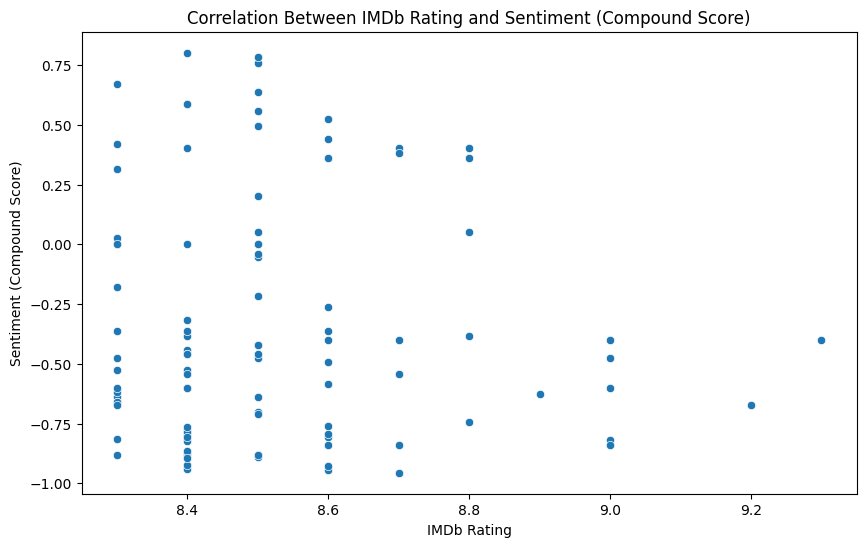

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='compound', data=df)
plt.title('Correlation Between IMDb Rating and Sentiment (Compound Score)')
plt.xlabel('IMDb Rating')
plt.ylabel('Sentiment (Compound Score)')
plt.show()

# Rating Distribution by Genre


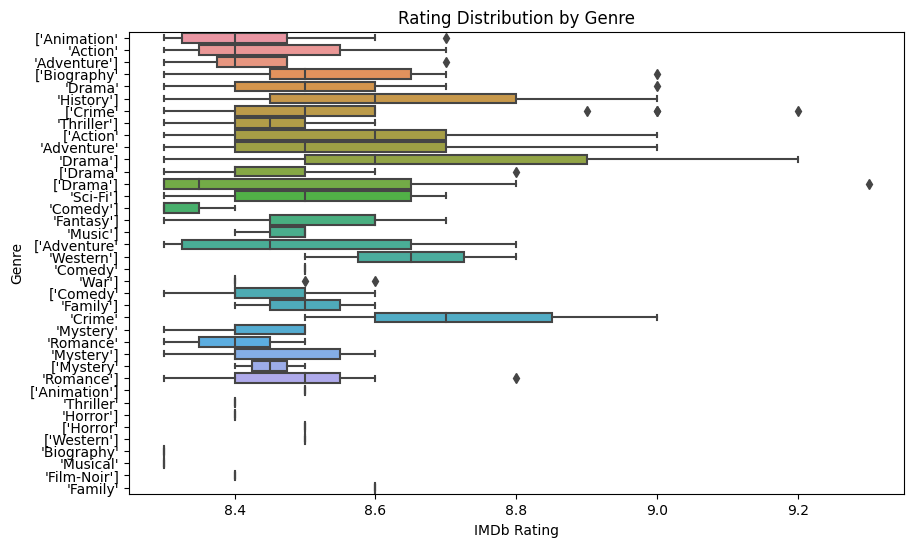

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y=all_genres, data=df_exploded)
plt.title('Rating Distribution by Genre')
plt.xlabel('IMDb Rating')
plt.ylabel('Genre')
plt.show()

# Movie Age vs Rating

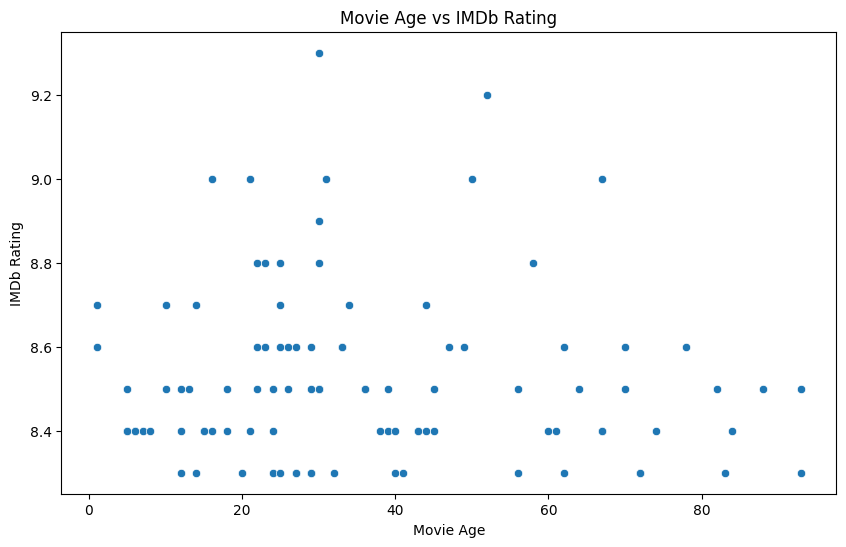

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='movie_age', y='rating', data=df)
plt.title('Movie Age vs IMDb Rating')
plt.xlabel('Movie Age')
plt.ylabel('IMDb Rating')
plt.show()

# Sentiment Component Breakdown

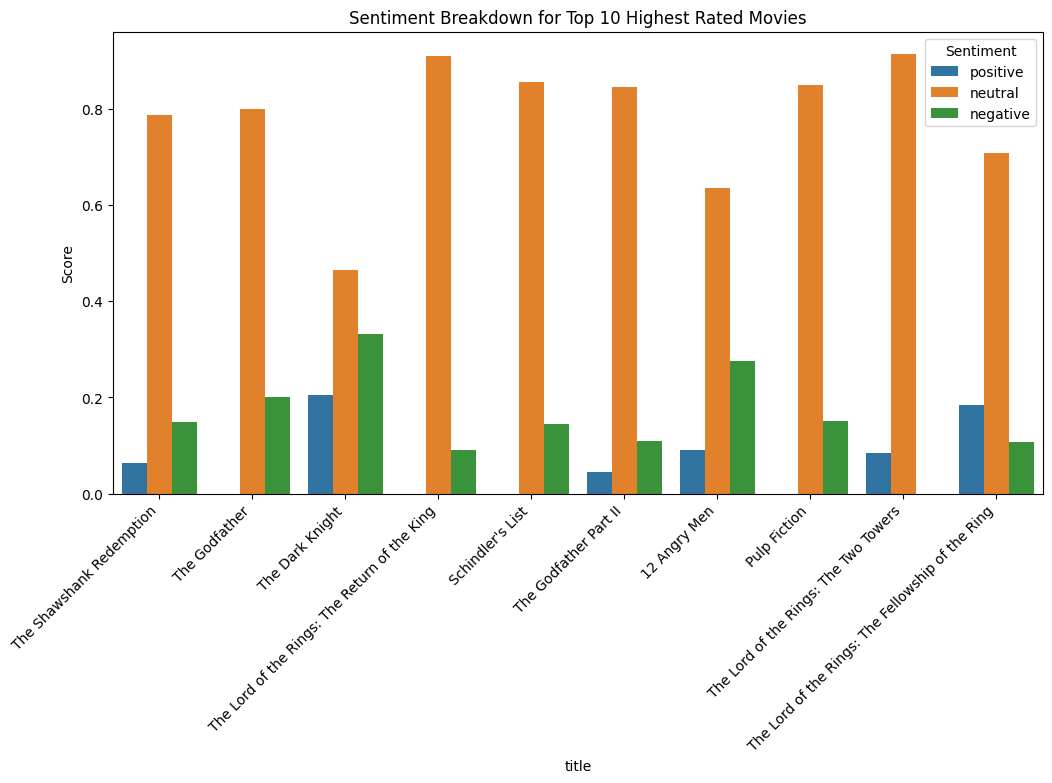

In [23]:
top_rated = df.nlargest(10, 'rating')
plt.figure(figsize=(12, 6))
top_rated_melted = top_rated.melt(id_vars=['title'], value_vars=['positive', 'neutral', 'negative'], 
                                  var_name='Sentiment', value_name='Score')
sns.barplot(x='title', y='Score', hue='Sentiment', data=top_rated_melted)
plt.title('Sentiment Breakdown for Top 10 Highest Rated Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

# Top 10 Highest Rated Movies

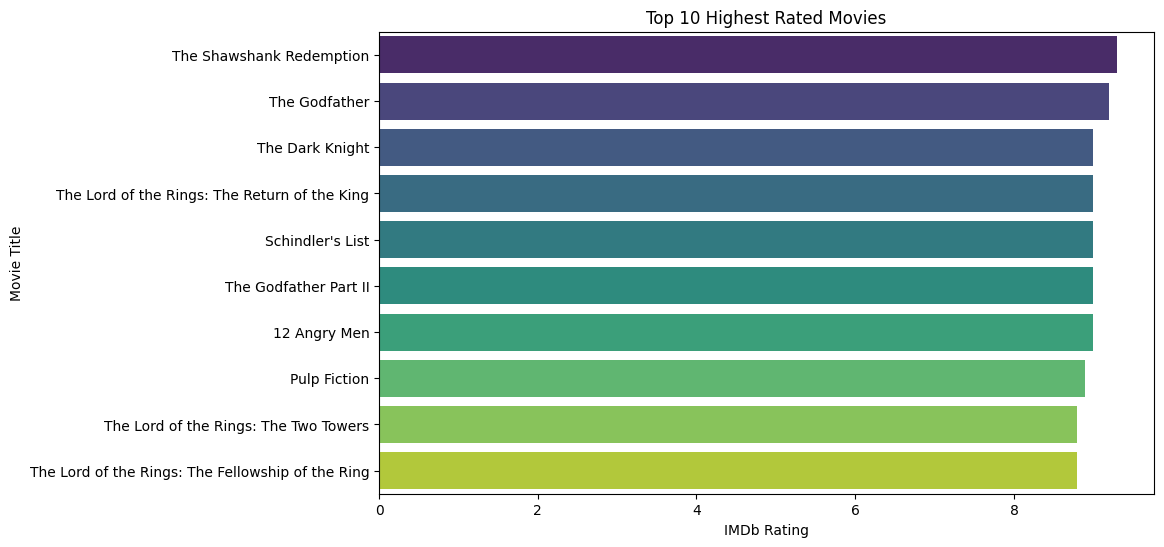

In [24]:
top10_movies = df.nlargest(10, 'rating')[['title', 'rating']]
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='title', data=top10_movies, palette='viridis')
plt.title('Top 10 Highest Rated Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.show()